# Bike Sharing
## Univariate Linear Regression

Read about the [bike sharing data set](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) to understand the strucuture of the data and what it was used for.

# Get the data

In [2]:
from pathlib import Path
from util.general import fetch_mlflow_logged_data, download_zip_file, unzip

dataset_name = 'bike-share'
ROOT_DIR = Path.cwd()
DATA_DIR = ROOT_DIR / 'data'
ZIP = Path.cwd() / 'tmp' / 'Bike-Sharing-Dataset.zip'
download_zip_file('https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip', ZIP)
unzip(ZIP, DATA_DIR)

import pandas as pd 
df = pd.read_csv(DATA_DIR / 'day.csv', )
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [29]:
df.head()

In [34]:
X = df.temp.to_numpy()
y = df.cnt.to_numpy()
X = X.reshape(-1, 1)

(array([  7.,  36.,  90., 104.,  93.,  80.,  93., 101., 103.,  24.]),
 array([0.0591304 , 0.13938406, 0.21963772, 0.29989138, 0.38014504,
        0.4603987 , 0.54065236, 0.62090602, 0.70115968, 0.78141334,
        0.861667  ]),
 <BarContainer object of 10 artists>)

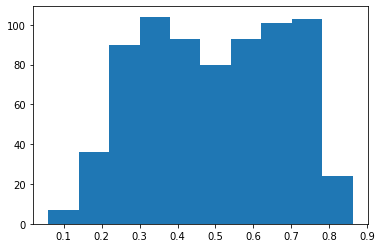

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(X)

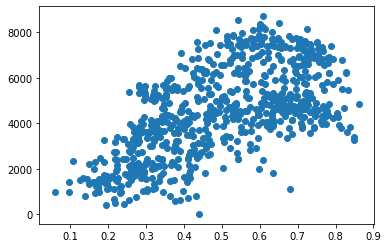

In [39]:
plt.scatter(X, y)

In [40]:
# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from pprint import pprint
import mlflow

def fetch_logged_data(run_id):
    client = mlflow.tracking.MlflowClient()
    data = client.get_run(run_id).data
    tags = {k: v for k, v in data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in client.list_artifacts(run_id, "model")]
    return data.params, data.metrics, tags, artifacts

# enable autologging
mlflow.sklearn.autolog()

# train a model
model = HistGradientBoostingClassifier()
with mlflow.start_run() as run:
    model.fit(X, y)    
    model.score(X, y)

# fetch logged data
params, metrics, tags, artifacts = fetch_logged_data(run.info.run_id)

pprint(params)

pprint(metrics)

pprint(tags)

pprint(artifacts)

2021/07/02 00:04:43 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior."
{'categorical_features': 'None',
 'early_stopping': 'auto',
 'l2_regularization': '0.0',
 'learning_rate': '0.1',
 'loss': 'auto',
 'max_bins': '255',
 'max_depth': 'None',
 'max_iter': '100',
 'max_leaf_nodes': '31',
 'min_samples_leaf': '20',
 'monotonic_cst': 'None',
 'n_iter_no_change': '10',
 'random_state': 'None',
 'scoring': 'loss',
 'tol': '1e-07',
 'validation_fraction': '0.1',
 'verbose': '0',
 'warm_start': 'False'}
{'training_accuracy_score': 0.3228454172366621,
 'training_f1_score': 0.17631452985643195,
 'training_log_loss': 1.2502124650086008,
 'training_precision_score': 0.13115432219399387,
 'training_recall_score': 0.3228454172366621,
 

In [ ]:
clf.predict()